## Data Cleaning

Steps for data cleaning 
 * load data sets
 * import additional data sets:
     * census population data from [Kaggle dataset](https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state)
     * vaccine data? 
 * convert dates to datetime objects 
 * aggregate daily data to have one value per day 
 * restrict to contiguous US States and DC
 * handle NaNs? 
 * create proportions, daily differences, and rolling averages for Covid measures 
 * merge datasets together...? 
 

In [2]:
# pandas and numpy for working with data
import pandas as pd 
import numpy as np

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# import daily reports by state 
daily_reports = pd.read_csv("../data/csse_covid_19_daily_reports_us.csv")
covid_metrics = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Total_Test_Results', 'People_Hospitalized']
daily_reports.head()


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
0,Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,7459.375895,1885216.0,NaN,1.332068,84000001.0,USA,38448.804196,NaN,NaN,NaN
1,Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN,NaN,NaN
2,American Samoa,US,2021-01-02 05:30:44,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN,NaN,NaN
3,Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,7285.171274,5155330.0,NaN,1.700087,84000004.0,USA,39551.860582,NaN,NaN,NaN
4,Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,7602.945718,2051488.0,NaN,1.617402,84000005.0,USA,67979.497674,NaN,NaN,NaN


In [16]:
daily_reports.replace({'2021-04-22 00::44':'2021-01-02 03:30:44'})

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
0,Alabama,US,2021-01-02 03:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,7459.375895,1885216.0,NaN,1.332068,84000001.0,USA,38448.804196,NaN,NaN,NaN
1,Alaska,US,2021-01-02 03:30:44,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN,NaN,NaN
2,American Samoa,US,2021-01-02 03:30:44,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN,NaN,NaN
3,Arizona,US,2021-01-02 03:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,7285.171274,5155330.0,NaN,1.700087,84000004.0,USA,39551.860582,NaN,NaN,NaN
4,Arkansas,US,2021-01-02 03:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,7602.945718,2051488.0,NaN,1.617402,84000005.0,USA,67979.497674,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20545,Virginia,US,2021-01-01 05:30:27,37.7693,-78.1700,349584,5032,30707.0,313845.0,51.0,4095.638473,4255991.0,NaN,1.439425,84000051.0,USA,49862.123205,NaN,NaN,NaN
20546,Washington,US,2021-01-01 05:30:27,47.4009,-121.4905,246752,3461,NaN,243291.0,53.0,3240.386963,3805390.0,NaN,1.402623,84000053.0,USA,49972.993711,NaN,NaN,NaN
20547,West Virginia,US,2021-01-01 05:30:27,38.4912,-80.9545,85334,1338,59508.0,24488.0,54.0,4761.551368,1514520.0,NaN,1.567957,84000054.0,USA,84508.692646,NaN,NaN,NaN
20548,Wisconsin,US,2021-01-01 05:30:27,44.2685,-89.6165,520438,5242,447500.0,67696.0,55.0,8938.495481,5348488.0,NaN,1.007229,84000055.0,USA,91860.002192,NaN,NaN,NaN


In [14]:
# manually adjust florida's "Late" Reporting to uniformize dates
daily_reports[(daily_reports['Province_State']=='Florida') & (daily_reports['Last_Update'] > pd.to_datetime('2020-04-14', utc=True)) & (daily_reports['Last_Update'] < pd.to_datetime('2020-04-15', utc=True))]


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate,UTC_Date_Last_Update,UTC_Adjusted_Date
5290,Florida,US,2020-04-14 00:42:00+00:00,27.7663,-81.6868,21019,499,NaN,122520.0,12.0,...,2833.0,NaN,84000012.0,USA,924.083459,2.302896,196207.0,0.405628,2020-04-14,2020-04-14
5349,Florida,US,2020-04-14 23:33:31+00:00,27.7663,-81.6868,21628,571,NaN,21057.0,12.0,...,3060.0,NaN,84000012.0,USA,956.924459,14.148326,203180.0,2.640096,2020-04-14,2020-04-14


In [17]:

# create datetime column with dates (drops time stamp) 
# convert string to datetime
daily_reports['Last_Update'] = pd.to_datetime(daily_reports.loc[:,'Last_Update'], utc=True)
# extract date only 
daily_reports['UTC_Date_Last_Update'] = daily_reports['Last_Update'].dt.date
# function to shift dates back one day for those after the time shift 
def add_day_after_date(datetime): 
    if datetime > pd.to_datetime('2020-04-22'):
        return datetime - pd.DateOffset(1)
    return datetime
daily_reports['UTC_Adjusted_Date'] = daily_reports['UTC_Date_Last_Update'].apply(add_day_after_date)



In [18]:
excluded_regions = ['Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'American Samoa', # territories
                    'Diamond Princess', 'Grand Princess', 'Guam', 'Recovered', # other 
                    'Alaska', 'Hawaii'] # non continuous states
continguous_US = list(set(list(daily_reports['Province_State'].unique())) - set(excluded_regions))
assert len(continguous_US) == 49 # 50 states + DC - Hawaii, Alaska

cont_daily_reports = daily_reports[daily_reports['Province_State'].isin(continguous_US)]
cont_daily_reports.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate,UTC_Date_Last_Update,UTC_Adjusted_Date
0,Alabama,US,2021-01-02 05:30:44+00:00,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,...,NaN,1.332068,84000001.0,USA,38448.804196,NaN,NaN,NaN,2021-01-02,2021-01-01
3,Arizona,US,2021-01-02 05:30:44+00:00,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,...,NaN,1.700087,84000004.0,USA,39551.860582,NaN,NaN,NaN,2021-01-02,2021-01-01
4,Arkansas,US,2021-01-02 05:30:44+00:00,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,...,NaN,1.617402,84000005.0,USA,67979.497674,NaN,NaN,NaN,2021-01-02,2021-01-01
5,California,US,2021-01-02 05:30:44+00:00,36.1162,-119.6816,2365024,26363,NaN,2309915.0,6.0,...,NaN,1.125160,84000006.0,USA,83666.036710,NaN,NaN,NaN,2021-01-02,2021-01-01
6,Colorado,US,2021-01-02 05:30:44+00:00,39.0598,-105.3111,337161,4873,18102.0,314186.0,8.0,...,NaN,1.445304,84000008.0,USA,77173.289416,NaN,NaN,NaN,2021-01-02,2021-01-01


In [19]:
def extract_unusual_day_diffs(data):
    sorted_data = data.sort_values('UTC_Adjusted_Date')
    day_diffs = sorted_data[['UTC_Adjusted_Date']].diff().rename(columns={'UTC_Adjusted_Date':'Days_Diff'})
    sorted_data = sorted_data.merge(day_diffs, how="inner", left_index=True, right_index=True)
    unusual_date_diffs = sorted_data[(sorted_data['Days_Diff']!=pd.Timedelta('1D')) & (~ sorted_data['Days_Diff'].isna())]
    return unusual_date_diffs
unusual_date_diff_data = cont_daily_reports.groupby('Province_State').apply(extract_unusual_day_diffs)
unusual_date_diff_data = unusual_date_diff_data.set_index(unusual_date_diff_data.index.droplevel('Province_State'))
unusual_date_diff_data.head()

# still need to manually shift florida's first 2020-4-14 entry back to 2020-4-13 

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate,UTC_Date_Last_Update,UTC_Adjusted_Date,Days_Diff
5290,Florida,US,2020-04-14 00:42:00+00:00,27.7663,-81.6868,21019,499,NaN,122520.0,12.0,...,NaN,84000012.0,USA,924.083459,2.302896,196207.0,0.405628,2020-04-14,2020-04-14,2 days
5349,Florida,US,2020-04-14 23:33:31+00:00,27.7663,-81.6868,21628,571,NaN,21057.0,12.0,...,NaN,84000012.0,USA,956.924459,14.148326,203180.0,2.640096,2020-04-14,2020-04-14,0 days


In [3]:
# create lists with groups of covid metrics (split by processing type)
covid_metrics_props = [metric + "_prop" for metric in covid_metrics]
covid_metrics_diffs = [metric + "_diff" for metric in covid_metrics]
covid_metrics_prop_diffs = [metric + "_prop_diff" for metric in covid_metrics]
covid_metrics_prop_diffs_rolling_avg_7D = [metric + "_prop_diff_rolling_avg_7D" for metric in covid_metrics]
covid_metrics_prop_diffs_rolling_avg_7D

['Confirmed_prop_diff_rolling_avg_7D',
 'Deaths_prop_diff_rolling_avg_7D',
 'Recovered_prop_diff_rolling_avg_7D',
 'Active_prop_diff_rolling_avg_7D',
 'Total_Test_Results_prop_diff_rolling_avg_7D',
 'People_Hospitalized_prop_diff_rolling_avg_7D']

In [4]:
# import data state population data from https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state
population_data = pd.read_csv('../data/2019_Census_US_Population_Data_By_State_Lat_Long.csv')
population_data.rename(columns={'STATE':'State', 'POPESTIMATE2019': 'Total Pop'}, inplace=True)
population_data.drop(columns=['lat','long'], inplace=True)
population_data.head()

,State,Total Pop
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [5]:
# merge population data into daily_counts dataframe 
daily_reports = daily_reports.merge(population_data, how='left', left_on='Province_State', right_on='State')

In [6]:
# filter only contiguous states in the US and DC (exclude territories, non-states/territories, and Hawaii/Alaska )
excluded_regions = ['Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'American Samoa', # territories
                    'Diamond Princess', 'Grand Princess', 'Guam', 'Recovered', # other 
                    'Alaska', 'Hawaii'] # non continuous states
continguous_US = list(set(list(daily_reports['Province_State'].unique())) - set(excluded_regions))
assert len(continguous_US) == 49 # 50 states + DC - Hawaii, Alaska

cont_daily_reports = daily_reports[daily_reports['Province_State'].isin(continguous_US)]
assert len(cont_daily_reports['Province_State'].unique()) == 49 # 50 states + DC - Hawaii, Alaska

In [7]:
# define helper functions for pipeline of data processing 
def load_state_data(state):
    return daily_reports[daily_reports["Province_State"]==state]

def create_proportion(data, col_name, total_col, output_name=False):
    if not output_name:
        output_name = col_name + '_prop'
    data_copy = data.copy()
    data_copy.loc[:,output_name] = data[col_name] / data[total_col]
    return data_copy 

def create_proportions(data, cols, total_col):
    for col_name in cols:
        data = create_proportion(data, col_name, total_col)
        print('Created proportions for {}'.format(col_name))
    return data 


def create_diff(data, col_name, output_name=False):
    if not output_name:
        output_name = col_name + '_diff'
    sorted_data = data.sort_values(by="Date_Last_Update")
    sorted_data.loc[:,output_name] = sorted_data.loc[:,col_name].diff()
    return sorted_data

def create_diffs(data, cols):
    for col_name in cols:
        data = create_diff(data, col_name)
        print('Created diffs for {}'.format(col_name))
    return data

def create_rolling_average_by_time(data, col_name,  window_offset, 
                                   output_name = False, date_col="Date_Last_Update"):
    if not output_name:
        output_name = col_name + '_rolling_avg_' + str(window_offset)
    temp_df = (data[[date_col,col_name]]
           .set_index(date_col)
           .sort_index()
           .rolling(window_offset).mean().reset_index()
           .rename(columns={col_name:output_name})
          )
    #requires day col to be unique! 
    data = data.merge(temp_df, how="left", left_on=date_col, right_on=date_col)
    return data

def create_rolling_averages_by_time(data, cols, window_offset):
    for col_name in cols:             
        print('Creating rolling avgs for {}'.format(col_name))
        data = create_rolling_average_by_time(data, col_name, window_offset)
    return data

def apply_pipeline(data):
    return (data.pipe(create_proportions, 
                      cols = covid_metrics, 
                      total_col = 'Total Pop')
                .pipe(create_diffs, cols=covid_metrics)
                .pipe(create_diffs, cols=covid_metrics_props)
                .pipe(create_rolling_averages_by_time, 
                    cols = covid_metrics_prop_diffs,
                    window_offset = '7D')
                .pipe(create_rolling_averages_by_time, 
                    cols = covid_metrics_diffs,
                    window_offset = '7D')
            )

In [8]:
def plot_states_over_time(state_names, feature_col, time_col="Date_Last_Update"):
    for state in state_names:
        sns.lineplot(data=state_reports[state], x=time_col, y=feature_col);
    plt.legend(labels=state_names);

In [9]:
florida = create_proportion(load_state_data('Florida'), 'Total_Test_Results', 'Total Pop')
florida = create_diff(florida, 'Total_Test_Results_prop')
florida = create_rolling_average_by_time(florida, 'Total_Test_Results_prop_diff', '7D')
florida.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate,Date_Last_Update,State,Total Pop,Total_Test_Results_prop,Total_Test_Results_prop_diff,Total_Test_Results_prop_diff_rolling_avg_7D
0,Florida,US,2020-04-12 23:18:15,27.7663,-81.6868,19895,461,NaN,19434.0,12.0,...,860.718651,13.933149,182753.0,2.317165,2020-04-12,Florida,21477737.0,NaN,NaN,NaN
1,Florida,US,2020-04-14 00:42:00,27.7663,-81.6868,21019,499,NaN,122520.0,12.0,...,924.083459,2.302896,196207.0,0.405628,2020-04-14,Florida,21477737.0,NaN,NaN,NaN
2,Florida,US,2020-04-14 00:42:00,27.7663,-81.6868,21019,499,NaN,122520.0,12.0,...,924.083459,2.302896,196207.0,0.405628,2020-04-14,Florida,21477737.0,NaN,NaN,NaN
3,Florida,US,2020-04-14 23:33:31,27.7663,-81.6868,21628,571,NaN,21057.0,12.0,...,956.924459,14.148326,203180.0,2.640096,2020-04-14,Florida,21477737.0,NaN,NaN,NaN
4,Florida,US,2020-04-14 23:33:31,27.7663,-81.6868,21628,571,NaN,21057.0,12.0,...,956.924459,14.148326,203180.0,2.640096,2020-04-14,Florida,21477737.0,NaN,NaN,NaN


In [ ]:
florida = apply_pipeline(load_state_data('Florida'))

Created proportions for Confirmed
Created proportions for Deaths
Created proportions for Recovered
Created proportions for Active
Created proportions for Total_Test_Results
Created proportions for People_Hospitalized
Created diffs for Confirmed
Created diffs for Deaths
Created diffs for Recovered
Created diffs for Active
Created diffs for Total_Test_Results
Created diffs for People_Hospitalized
Created diffs for Confirmed_prop
Created diffs for Deaths_prop
Created diffs for Recovered_prop
Created diffs for Active_prop
Created diffs for Total_Test_Results_prop
Created diffs for People_Hospitalized_prop
Creating rolling avgs for Confirmed_prop_diff
Creating rolling avgs for Deaths_prop_diff
Creating rolling avgs for Recovered_prop_diff
Creating rolling avgs for Active_prop_diff
Creating rolling avgs for Total_Test_Results_prop_diff


In [13]:
# read in states into dictionary and apply pipeline to each 
state_reports = {}
if 'Florida' in continguous_US:
    continguous_US.remove('Florida')
for state in continguous_US:
    print(state)
    # the following line is getting hung up on create rolling avgs for Test_Results_prop_diff for Florida... 
    state_reports[state] = apply_pipeline(load_state_data(state))

Kansas
Created proportions for Confirmed
Created proportions for Deaths
Created proportions for Recovered
Created proportions for Active
Created proportions for Total_Test_Results
Created proportions for People_Hospitalized
Created diffs for Confirmed
Created diffs for Deaths
Created diffs for Recovered
Created diffs for Active
Created diffs for Total_Test_Results
Created diffs for People_Hospitalized
Created diffs for Confirmed_prop
Created diffs for Deaths_prop
Created diffs for Recovered_prop
Created diffs for Active_prop
Created diffs for Total_Test_Results_prop
Created diffs for People_Hospitalized_prop
Creating rolling avgs for Confirmed_prop_diff
Creating rolling avgs for Deaths_prop_diff
Creating rolling avgs for Recovered_prop_diff
Creating rolling avgs for Active_prop_diff
Creating rolling avgs for Total_Test_Results_prop_diff
Creating rolling avgs for People_Hospitalized_prop_diff
Creating rolling avgs for Confirmed_diff
Creating rolling avgs for Deaths_diff
Creating rolling

Creating rolling avgs for Active_prop_diff
Creating rolling avgs for Total_Test_Results_prop_diff
Creating rolling avgs for People_Hospitalized_prop_diff
Creating rolling avgs for Confirmed_diff
Creating rolling avgs for Deaths_diff
Creating rolling avgs for Recovered_diff
Creating rolling avgs for Active_diff
Creating rolling avgs for Total_Test_Results_diff
Creating rolling avgs for People_Hospitalized_diff
Michigan
Created proportions for Confirmed
Created proportions for Deaths
Created proportions for Recovered
Created proportions for Active
Created proportions for Total_Test_Results
Created proportions for People_Hospitalized
Created diffs for Confirmed
Created diffs for Deaths
Created diffs for Recovered
Created diffs for Active
Created diffs for Total_Test_Results
Created diffs for People_Hospitalized
Created diffs for Confirmed_prop
Created diffs for Deaths_prop
Created diffs for Recovered_prop
Created diffs for Active_prop
Created diffs for Total_Test_Results_prop
Created diff

Creating rolling avgs for People_Hospitalized_prop_diff
Creating rolling avgs for Confirmed_diff
Creating rolling avgs for Deaths_diff
Creating rolling avgs for Recovered_diff
Creating rolling avgs for Active_diff
Creating rolling avgs for Total_Test_Results_diff
Creating rolling avgs for People_Hospitalized_diff
Massachusetts
Created proportions for Confirmed
Created proportions for Deaths
Created proportions for Recovered
Created proportions for Active
Created proportions for Total_Test_Results
Created proportions for People_Hospitalized
Created diffs for Confirmed
Created diffs for Deaths
Created diffs for Recovered
Created diffs for Active
Created diffs for Total_Test_Results
Created diffs for People_Hospitalized
Created diffs for Confirmed_prop
Created diffs for Deaths_prop
Created diffs for Recovered_prop
Created diffs for Active_prop
Created diffs for Total_Test_Results_prop
Created diffs for People_Hospitalized_prop
Creating rolling avgs for Confirmed_prop_diff
Creating rolling

Created diffs for Active_prop
Created diffs for Total_Test_Results_prop
Created diffs for People_Hospitalized_prop
Creating rolling avgs for Confirmed_prop_diff
Creating rolling avgs for Deaths_prop_diff
Creating rolling avgs for Recovered_prop_diff
Creating rolling avgs for Active_prop_diff
Creating rolling avgs for Total_Test_Results_prop_diff
Creating rolling avgs for People_Hospitalized_prop_diff
Creating rolling avgs for Confirmed_diff
Creating rolling avgs for Deaths_diff
Creating rolling avgs for Recovered_diff
Creating rolling avgs for Active_diff
Creating rolling avgs for Total_Test_Results_diff
Creating rolling avgs for People_Hospitalized_diff
Mississippi
Created proportions for Confirmed
Created proportions for Deaths
Created proportions for Recovered
Created proportions for Active
Created proportions for Total_Test_Results
Created proportions for People_Hospitalized
Created diffs for Confirmed
Created diffs for Deaths
Created diffs for Recovered
Created diffs for Active
Cr

Creating rolling avgs for Deaths_prop_diff
Creating rolling avgs for Recovered_prop_diff
Creating rolling avgs for Active_prop_diff
Creating rolling avgs for Total_Test_Results_prop_diff
Creating rolling avgs for People_Hospitalized_prop_diff
Creating rolling avgs for Confirmed_diff
Creating rolling avgs for Deaths_diff
Creating rolling avgs for Recovered_diff
Creating rolling avgs for Active_diff
Creating rolling avgs for Total_Test_Results_diff
Creating rolling avgs for People_Hospitalized_diff
Louisiana
Created proportions for Confirmed
Created proportions for Deaths
Created proportions for Recovered
Created proportions for Active
Created proportions for Total_Test_Results
Created proportions for People_Hospitalized
Created diffs for Confirmed
Created diffs for Deaths
Created diffs for Recovered
Created diffs for Active
Created diffs for Total_Test_Results
Created diffs for People_Hospitalized
Created diffs for Confirmed_prop
Created diffs for Deaths_prop
Created diffs for Recovered

Creating rolling avgs for Active_prop_diff
Creating rolling avgs for Total_Test_Results_prop_diff
Creating rolling avgs for People_Hospitalized_prop_diff
Creating rolling avgs for Confirmed_diff
Creating rolling avgs for Deaths_diff
Creating rolling avgs for Recovered_diff
Creating rolling avgs for Active_diff
Creating rolling avgs for Total_Test_Results_diff
Creating rolling avgs for People_Hospitalized_diff
Oregon
Created proportions for Confirmed
Created proportions for Deaths
Created proportions for Recovered
Created proportions for Active
Created proportions for Total_Test_Results
Created proportions for People_Hospitalized
Created diffs for Confirmed
Created diffs for Deaths
Created diffs for Recovered
Created diffs for Active
Created diffs for Total_Test_Results
Created diffs for People_Hospitalized
Created diffs for Confirmed_prop
Created diffs for Deaths_prop
Created diffs for Recovered_prop
Created diffs for Active_prop
Created diffs for Total_Test_Results_prop
Created diffs 

Created diffs for Confirmed_prop
Created diffs for Deaths_prop
Created diffs for Recovered_prop
Created diffs for Active_prop
Created diffs for Total_Test_Results_prop
Created diffs for People_Hospitalized_prop
Creating rolling avgs for Confirmed_prop_diff
Creating rolling avgs for Deaths_prop_diff
Creating rolling avgs for Recovered_prop_diff
Creating rolling avgs for Active_prop_diff
Creating rolling avgs for Total_Test_Results_prop_diff
Creating rolling avgs for People_Hospitalized_prop_diff
Creating rolling avgs for Confirmed_diff
Creating rolling avgs for Deaths_diff
Creating rolling avgs for Recovered_diff
Creating rolling avgs for Active_diff
Creating rolling avgs for Total_Test_Results_diff
Creating rolling avgs for People_Hospitalized_diff


In [ ]:
# read in states into dictionary and apply pipeline to each 
state_reports = {}
for state in ['California','Oregon','Nevada','Arizona']:
    print(state)
    state_reports[state] = apply_pipeline(load_state_data(state))

In [ ]:
state_reports['California'].head()

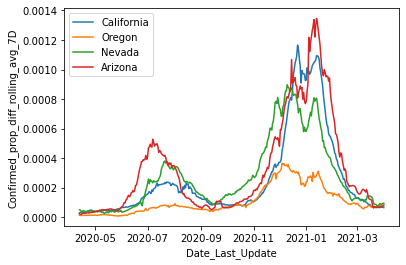

In [14]:
plot_states_over_time(['California','Oregon','Nevada','Arizona'], 'Confirmed_prop_diff_rolling_avg_7D')